## Mulitple linear regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import math

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
df=pd.DataFrame({
    'area': [2600, 3000, 3200, 3600, 4000],
    'bedrooms': [3, 4, np.nan,3,5],  # 5th row (index 4) is NaN
    'age': [20,15,18,30,8],
    'price':[550000, 565000, 610000, 595000, 760000]
})

In [6]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [7]:
mn=math.floor(df.bedrooms.median())

In [8]:
df.bedrooms=df.bedrooms.fillna(mn)

In [18]:
reg=linear_model.LinearRegression()

In [25]:
## y= m1.x1 + m2.x2 + mn.xn + b
x=reg.fit(df[['area','bedrooms','age']],df['price'])

In [26]:
#m1 m2 m3
reg.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [27]:
#b
reg.intercept_

383724.9999999998

In [28]:
reg.predict([[3000,3,40]])

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [32]:
df['predicted_price'] = reg.predict(df[['area', 'bedrooms', 'age']])

In [33]:
df

,area,bedrooms,age,price,predicted_price
0,2600,3.0,20,550000,526000.0
1,3000,4.0,15,565000,589000.0
2,3200,3.0,18,610000,622000.0
3,3600,3.0,30,595000,595000.0
4,4000,5.0,8,760000,748000.0


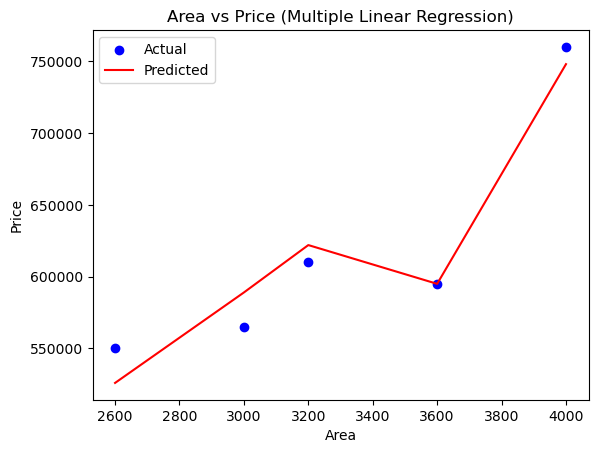

In [37]:
plt.scatter(df['area'], df['price'], color='blue', label='Actual')
plt.plot(df['area'], df['predicted_price'], color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price (Multiple Linear Regression)')
plt.legend()